In [5]:
import pandas as pd

df = pd.read_csv('../data/dataset.csv')

df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.sort_values("DateTime")
df.set_index("DateTime", inplace=True)

df.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [6]:
# Informations sur le dataset
print("Informations sur le dataset :")
print(f"Période : {df.index.min()} à {df.index.max()}")
print(f"Nombre total d'heures : {len(df)}")

print(f"\nNombre de valeurs manquantes par colonne :", df.isnull().sum().sum())

print(f"\nStatistiques descriptives :")
df.describe()

Informations sur le dataset :
Période : 2019-01-01 00:00:00 à 2025-03-19 23:00:00
Nombre total d'heures : 54170

Nombre de valeurs manquantes par colonne : 0

Statistiques descriptives :


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,54170.000000,54170.000000,54170.000000,54170.000000,54170.000000,54170.000000,54170.000000,54170.000000,54170.000000
mean,6526.463688,6380.179989,1282.480377,771.727691,1792.639616,1166.843696,1138.501052,171.808381,54.938859
std,1048.248455,1015.393399,241.188791,666.534396,679.983743,433.926493,329.928643,257.257698,13.761794
min,2922.000000,3119.000000,562.000000,-26.000000,175.000000,195.000000,279.000000,0.000000,17.000000
25%,5710.000000,5639.000000,1341.000000,228.000000,1281.000000,860.000000,890.000000,0.000000,45.000000
50%,6474.000000,6322.000000,1378.000000,571.000000,1679.000000,1208.000000,1113.000000,3.000000,55.000000
75%,7268.000000,7057.750000,1400.000000,1167.000000,2191.000000,1510.000000,1358.000000,302.000000,65.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1552.000000,89.000000


In [7]:
df.columns.tolist()

['Consumption',
 'Production',
 'Nuclear',
 'Wind',
 'Hydroelectric',
 'Oil and Gas',
 'Coal',
 'Solar',
 'Biomass']

#### Question 1 : Pourquoi l’ordre temporel est critique ?

##### Réponse :

L’ordre temporel est **essentiel** en séries temporelles car :

- **Dépendance séquentielle** : la valeur à l’instant *t* dépend des valeurs passées (*t−1, t−2…*).
- **Causalité** : le futur ne peut pas influencer le passé ; on prédit toujours le futur à partir du passé.
- **Patterns temporels** : les cycles sont séquentiels et doivent être conservés.
- **Validation réaliste** : en pratique, on entraîne sur le passé et on teste sur le futur.

---

#### Question 2 : Pourquoi ne pas mélanger les données (pas de shuffle) ?

##### Réponse :

- Mélanger les données provoque du **data leakage**.
- Le modèle peut apprendre avec des données du **futur** et être testé sur le **passé**.
- Les performances deviennent **faussement élevées** et non exploitables.

### A NOTER: 
En séries temporelles, on utilise **toujours un split chronologique**, jamais aléatoire.


#### Question 3 : Pourquoi la normalisation est indispensable en Deep Learning ?

##### Réponse :

La normalisation est indispensable en Deep Learning pour les raisons suivantes :

- **Convergence plus rapide** :  
  Les gradients sont mieux équilibrés, ce qui permet aux algorithmes d’optimisation (comme Adam) de converger plus rapidement et avec moins d’époques.

- **Éviter la saturation des fonctions d’activation** :  
  Les fonctions comme *tanh* et *sigmoid* saturent avec de grandes valeurs, ce qui entraîne des gradients proches de zéro (vanishing gradient).  
  La normalisation maintient les valeurs dans une zone active, facilitant l’apprentissage.

- **Échelles comparables entre variables** :  
  Sans normalisation, les variables ayant de grandes valeurs dominent l’apprentissage.  
  La normalisation permet à toutes les variables d’avoir un poids comparable.

- **Stabilité numérique** :  
  Elle réduit les risques d’overflow et d’underflow et améliore la précision des calculs matriciels.

---

#### Question 4 : Pourquoi MinMaxScaler plutôt que StandardScaler pour LSTM ?

##### Réponse :

##### Différences principales :

**MinMaxScaler** :
- Met les données dans l’intervalle [0, 1]  
- Formule : `X_scaled = (X - X_min) / (X_max - X_min)`  
- Préserve la distribution originale

**StandardScaler** :
- Centre les données (moyenne = 0, écart-type = 1)  
- Formule : `X_scaled = (X - mean) / std`  
- Génère des valeurs négatives et positives

##### Pourquoi MinMaxScaler est plus adapté aux LSTM :

- Les LSTM utilisent principalement les fonctions d’activation *sigmoid* et *tanh*, qui fonctionnent mieux avec des entrées comprises entre 0 et 1.
- MinMaxScaler évite les valeurs négatives extrêmes, améliorant la stabilité numérique.
- L’interprétation est plus intuitive :  
  0 correspond à la valeur minimale observée et 1 à la valeur maximale.
- Il est généralement plus adapté aux données de consommation et moins sensible aux variations brusques dans ce contexte.

**Remarque** : StandardScaler reste utilisable, mais il nécessite plus de précautions dans le réglage du modèle.


In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Créer le scaler
scaler = MinMaxScaler()

# Normaliser toutes les colonnes
scaled_data = scaler.fit_transform(df)


## Question 5 : Pourquoi un LSTM attend des données en 3D ?

### Réponse :

Les LSTM nécessitent des données en **3 dimensions** afin de modéliser correctement les dépendances temporelles.

### Format requis :
(samples, timesteps, features)

---

### Dimension 1 : samples (échantillons)
- Nombre de **séquences** utilisées pour l’entraînement
- Chaque séquence représente un exemple d’apprentissage

---

### Dimension 2 : timesteps (pas de temps)
- Longueur de chaque séquence temporelle
- Nombre d’observations successives
- Dans notre cas : **24 heures** consécutives

---

### Dimension 3 : features (variables)
- Nombre de variables observées à chaque instant
- Dans notre cas : **9 variables**  
  (Consumption, Production, Nuclear, Wind, Solar, Hydroelectric, Coal, Oil and Gas, Biomass)

---

### Signification des dimensions :

| Axe | Nom       | Signification               | Projet      |
|-----|-----------|-----------------------------|-------------|
| 0   | samples   | Nombre de séquences         | Variable    |
| 1   | timesteps | Longueur de chaque séquence | 24 heures   |
| 2   | features  | Variables par instant       | 9 variables |

---

### Pourquoi cette structure est nécessaire ?

- **Traitement séquentiel** : le LSTM traite les pas de temps un par un.
- **Contexte temporel** : chaque timestep contient l’ensemble des variables.
- **Apprentissage des dépendances** : le modèle apprend l’évolution des données dans le temps.


In [10]:
def create_sequences(data, window=24):
    """
    Transforme les données tabulaires en séquences temporelles
    
    Args:
        data: données normalisées (array 2D)
        window: nombre d'heures passées à utiliser (24h par defaut)
    
    Returns:
        X: séquences d'entrée (samples, timesteps, features)
        y: valeurs cibles (consommation à t+1)
    """
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])  # Les 24 dernières heures
        y.append(data[i, 0])  # Consumption est la 1ère colonne
    return np.array(X), np.array(y)

# Créer les séquences
window_size = 24
X, y = create_sequences(scaled_data, window=window_size)

## Question 6 : Pourquoi on ne fait pas de train_test_split classique ?

### Réponse :

### Problème avec train_test_split de sklearn

La fonction `train_test_split()` effectue un **découpage aléatoire** des données, ce qui est inadapté aux séries temporelles.

```python
# À NE PAS FAIRE pour des séries temporelles
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
```

Ce mélange casse l’ordre chronologique des observations.


##### Solution correcte pour les séries temporelles : split séquentiel
```python
# Split chronologique correct
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
```
Le modèle est entraîné uniquement sur le passé et évalué sur le futur.

##### **Visualisation du split :**

```
Timeline du dataset :
├──────────────────────── 80% TRAIN ────────────────────────┤├─── 20% TEST ───┤
│                                                             │                 │
2020-01-01                                            2023-12-31         2024-12-31

Le modèle apprend sur le PASSÉ (2020-2023)
Le modèle est testé sur le FUTUR (2024)
```

##### **Risque de DATA LEAKAGE (fuite de données temporelles)**

###### Scénario catastrophe avec shuffle :

1. **Séquence du futur dans le train** :
   - Le modèle s'entraîne sur la semaine du 15-21 août 2024

2. **Séquence du passé dans le test** :
   - On teste le modèle sur la semaine du 10-16 août 2024

3. **Problème** :
   - Le modèle a **déjà vu** des données proches dans le train
   - Il "triche" en utilisant des informations du futur
   - Les performances sont **artificiellement bonnes**

4. **En production** :
   - Le modèle ne peut pas prédire le futur avec ces performances
   - **ÉCHEC TOTAL** du déploiement

---

##### **A NOTER pour séries temporelles :**

1. ✅ **TOUJOURS** split chronologique (séquentiel)
2. ❌ **JAMAIS** de shuffle
3. ✅ Train sur le **passé**, test sur le **futur**
4. ✅ Validation également séquentielle
5. ✅ En production : prédire UNIQUEMENT le futur inconnu

In [11]:
# Split temporel (80% train, 20% test)
split_index = int(0.8 * len(X))

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


print(f"Train : {X_train.shape[0]}")
print(f"Test  : {X_test.shape[0]}")


Train : 43316
Test  : 10830


#### Question 7 : Impact du nombre d’unités LSTM

##### Réponse 

- Une unité LSTM = cellule mémoire qui stocke, oublie et met à jour l’information temporelle.
- **Nombre d’unités** :
  - Peu (16–32) : rapide mais risque de sous-apprentissage
  - Moyen (64–128) : équilibre capacité/performance 
  - Élevé (256–512) : capture des patterns complexes mais risque de surapprentissage
- **Choix pour notre projet** : 64 unités → suffisant pour cycles jour/nuit, rapide, robuste.

---

#### Question 8 : 1 ou plusieurs couches LSTM

##### Réponse

- **1 couche** : capture patterns simples, rapide, faible risque d’overfitting 
- **2+ couches (stacked)** : capture patterns complexes, plus lent, risque d’overfitting
- **Choix** : 1 couche → adapté aux patterns de consommation simples

---

#### Question 9 : Rôle du Dropout

##### Réponse 

- **Dropout(p)** = désactive aléatoirement *p*% des neurones à chaque itération
- **Objectif** : régularisation → éviter l’overfitting
- **Effet** :
  - Sans Dropout : mémorisation, co-dépendances, surapprentissage
  - Avec Dropout : neurones indépendants, meilleure généralisation

| Taux | Effet | Quand l'utiliser |
|------|-------|------------------|
| 0.0 (pas de Dropout) | Aucune régularisation | Peu de données, underfitting |
| **0.2**  | Régularisation légère | Recommandé par défaut |
| 0.5 | Régularisation forte | Beaucoup de données, overfitting sévère |
| 0.8 | Trop fort |  Peut bloquer l'apprentissage |

###### **Notre choix : Dropout(0.2)**
- Régularisation **modérée** et **standard**
- Bon équilibre entre apprentissage et généralisation


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    LSTM(128, input_shape=(window_size, X.shape[2])),  # 64 → 128
    Dropout(0.2),
    Dense(64, activation='relu'),  
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')



2026-01-02 20:21:58.991053: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-02 20:21:59.298326: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-02 20:22:01.576373: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/manalfarouqi/Documents/Simplon/Programme SAS/Brief/EV-LSTM-FORECAST/venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
2026-01-02 20:22:02.402150: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNA

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callback 1 : Arrêt anticipé si pas d'amélioration
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,                    # Attend 4 époques sans amélioration
    restore_best_weights=True      # Restaure les meilleurs poids
)

# Callback 2 : Sauvegarde du meilleur modèle
checkpointer = ModelCheckpoint(
    filepath='model.weights.best.keras',  # Fichier de sauvegarde
    verbose=1,                             # Affiche un message lors de la sauvegarde
    save_best_only=True,                   # Sauvegarde uniquement le meilleur
    monitor='val_loss'                     # Critère : validation loss
)

# Callback 3 : Réduction du learning rate si plateau
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',     # Surveille la perte de validation
    factor=0.2,             # Réduit le LR à 20% de sa valeur
    patience=3,             # Attend 3 époques sans amélioration
    verbose=1,              # Affiche les changements
    min_delta=0.0001,       # Seuil minimal d'amélioration
    min_lr=1e-7             # Learning rate minimum
)

# Entraîner le modèle avec tous les callbacks
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpointer, reduce_learningrate],  
    verbose=1
)


Epoch 1/50


2026-01-02 20:22:24.631186: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 29939328 exceeds 10% of free system memory.


1081/1083 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210
Epoch 1: val_loss improved from None to 0.00142, saving model to model.weights.best.keras

Epoch 1: finished saving model to model.weights.best.keras
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 0.0099 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/50
1080/1083 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0037
Epoch 2: val_loss improved from 0.00142 to 0.00100, saving model to model.weights.best.keras

Epoch 2: finished saving model to model.weights.best.keras
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.0032 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 3/50
1082/1083 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0021
Epoch 3: val_loss improved from 0.00100 to 0.00071, saving model to model.weights.best.keras

Epoch 3: finished saving model to model.weights.best.keras
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.0019 - val_loss: 7.0865e-04 - learning_rate: 0.0010
Epoch 4/50
1080/1083 ━━━━━━━━━━━

#### Question 10 : Analyser les courbes loss vs val_loss

##### Réponse 

Les courbes d'entraînement permettent de diagnostiquer la **qualité de l'apprentissage**.

---

### Scénarios principaux

1. **Apprentissage sain (idéal)** 
- Loss et Val_Loss diminuent ensemble et restent proches
- Interprétation : le modèle apprend et généralise bien
- Action : continuer l'entraînement normalement

2. **Overfitting (surapprentissage)** 
- Loss continue de baisser, Val_Loss stagne ou augmente
- Gap important entre Loss et Val_Loss
- Interprétation : le modèle mémorise le train, mauvaise généralisation
- Solutions :
  - Augmenter le **Dropout**
  - Réduire le nombre d'**époques** avec **EarlyStopping**
  - Ajouter plus de **données d'entraînement**
  - Réduire la **complexité** du modèle (moins d'unités ou de couches LSTM)
  - Ajouter de la **régularisation L2**
  - Sauvegarder le meilleur modèle avec **ModelCheckpoint** pour conserver les poids optimaux
  - Ajuster le **learning rate** automatiquement avec **ReduceLROnPlateau** si la validation stagne

3. **Underfitting (sous-apprentissage)** 
- Loss et Val_Loss stagnent haut
- Interprétation : modèle trop simple, ne capture pas les patterns
- Solutions :
  - Augmenter le nombre d'**unités LSTM**
  - Ajouter une **2ème couche LSTM**
  - Augmenter le nombre d'**époques**
  - Réduire le **Dropout**
  - Ajouter plus de **features** (variables explicatives)

4. **Gap constant entre Loss et Val_Loss** 
- Loss diminue mais Val_Loss reste moyennement haute
- Interprétation : léger overfitting
- Solutions :
  - Utiliser **EarlyStopping** pour arrêter l'entraînement au bon moment
  - Ajuster légèrement le **Dropout**
  - Surveiller les prochaines époques
  - Sauvegarder le meilleur modèle avec **ModelCheckpoint**
  - Réduire le **learning rate** avec **ReduceLROnPlateau** si nécessaire

---

### Récapitulatif des callbacks utiles

- **EarlyStopping** : arrêt anticipé si pas d'amélioration de la `val_loss`
- **ModelCheckpoint** : sauvegarde automatique du meilleur modèle
- **ReduceLROnPlateau** : réduit le learning rate si la performance stagne

Ces outils permettent de **prévenir l'overfitting**, **optimiser la convergence**, et **garantir que le modèle final est le meilleur possible**.


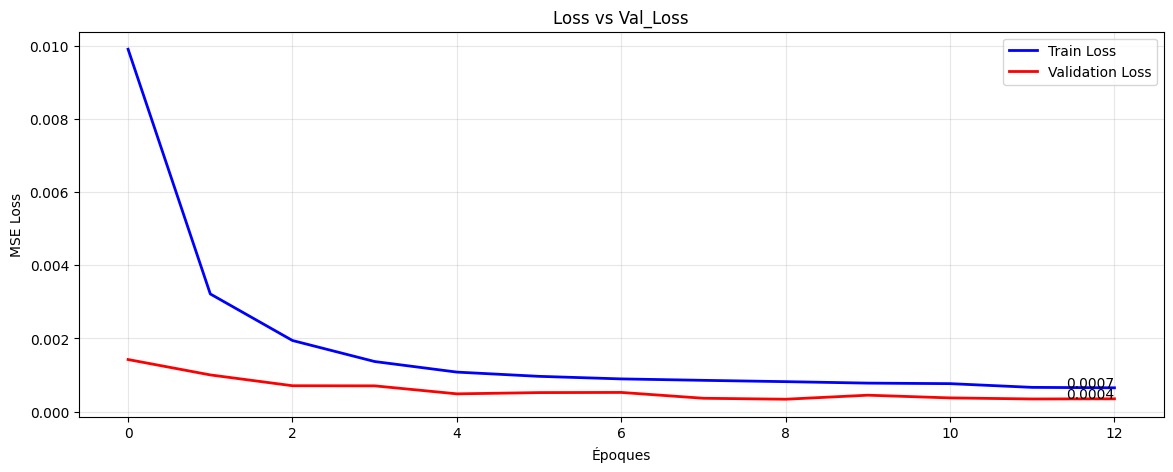

Loss finale     : 0.000652
Val_Loss finale : 0.000351
Écart (gap)     : 0.000301


In [16]:
import matplotlib.pyplot as plt

# Visualisation des courbes d'entraînement
plt.figure(figsize=(14, 5))

plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
plt.title('Loss vs Val_Loss')
plt.xlabel('Époques')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(alpha=0.3)

# Annoter les dernières valeurs
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
plt.text(len(history.history['loss'])-1, final_loss, f'{final_loss:.4f}', ha='right')
plt.text(len(history.history['val_loss'])-1, final_val_loss, f'{final_val_loss:.4f}', ha='right')

plt.show()

# Analyse rapide
gap = abs(final_val_loss - final_loss)
print(f"Loss finale     : {final_loss:.6f}")
print(f"Val_Loss finale : {final_val_loss:.6f}")
print(f"Écart (gap)     : {gap:.6f}")


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions sur le test
y_pred = model.predict(X_test)

# Métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métriques de performance :")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {np.sqrt(mse):.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")

339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Métriques de performance :
MSE  : 0.000787
RMSE : 0.028053
MAE  : 0.019247
R²   : 0.9654
